<a href="https://colab.research.google.com/github/MonikSense/GLAUCOMA/blob/main/grayscalegreenchannel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
✅ Processed first 5 images only.


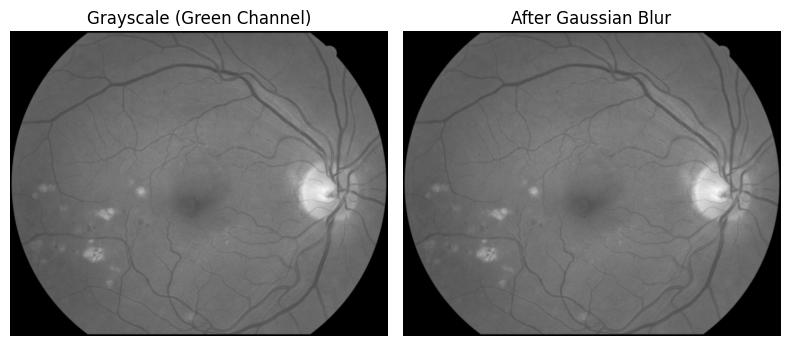

In [1]:
!pip install scikit-image
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
# Base dataset directory
base_dir = "/content/drive/MyDrive/GlaucomaDataset/G1020"

# Choose ONE folder only (simpler + safer)
folder = "Images"   # or Images_Cropped / Images_Square

input_dir = os.path.join(base_dir, folder)
output_dir = os.path.join(base_dir, "blurred_first5")

os.makedirs(output_dir, exist_ok=True)
def grayscale_green_channel(img_bgr):
    """Green channel extraction (best for fundus images)"""
    return img_bgr[:, :, 1]
kernel_size = (7, 7)
sigma = 0

processed = 0
example_gray = None
example_blur = None

for img_name in os.listdir(input_dir):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(input_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    # ---- Grayscale ----
    gray = grayscale_green_channel(img)

    # ---- Gaussian Blur ----
    blurred = cv2.GaussianBlur(gray, kernel_size, sigma)

    # Save output
    cv2.imwrite(os.path.join(output_dir, img_name), blurred)

    # Save ONE example for visualization
    if example_gray is None:
        example_gray = gray
        example_blur = blurred

    processed += 1
    if processed == 5:
        break

print("✅ Processed first 5 images only.")
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(example_gray, cmap="gray")
plt.title("Grayscale (Green Channel)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(example_blur, cmap="gray")
plt.title("After Gaussian Blur")
plt.axis("off")

plt.tight_layout()
plt.show()
